In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/archive.csv')


In [ ]:
df['Carbon Dioxide (ppm)'].isnull().sum()

np.int64(17)

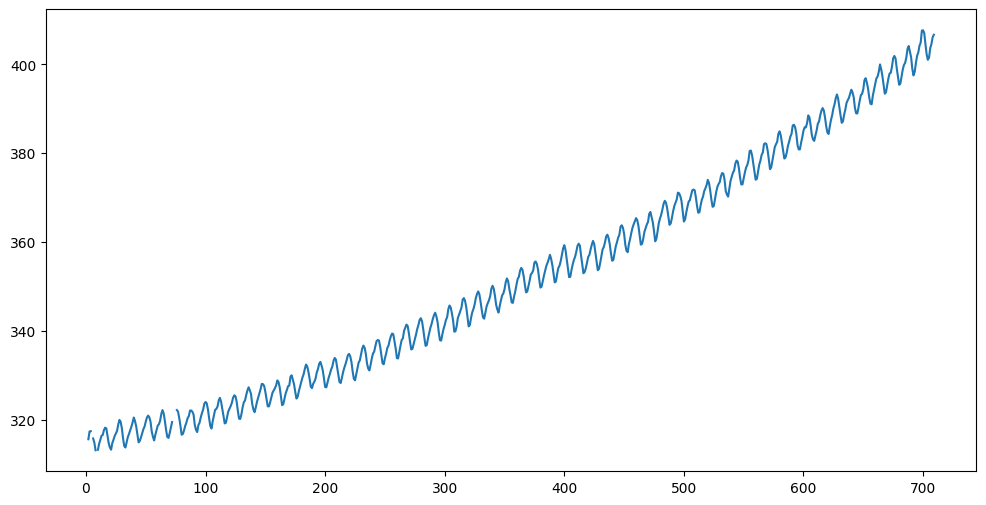

In [ ]:

plt.figure(figsize = (12,6))
plt.plot(df['Carbon Dioxide (ppm)'])

In [ ]:
df['co2'] = df['Carbon Dioxide (ppm)']

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['co2'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 4.253641443951835
p-value: 1.0


In [ ]:
df = df.fillna(method = 'bfill')
df = df.fillna(method = 'ffill')

/tmp/ipython-input-3557557817.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'bfill')
/tmp/ipython-input-3557557817.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method = 'ffill')


In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
Decimal Date,0
Carbon Dioxide (ppm),0
Seasonally Adjusted CO2 (ppm),0
Carbon Dioxide Fit (ppm),0
Seasonally Adjusted CO2 Fit (ppm),0
co2,0


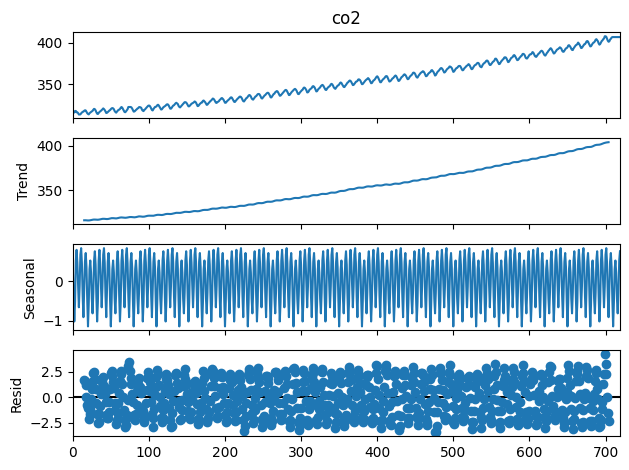

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['co2'], model='additive',period = 30)
decomposition.plot()
plt.show()


In [ ]:
df

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),co2
0,1958,1,1958.0411,315.69,314.42,316.18,314.89,315.69
1,1958,2,1958.1260,315.69,314.42,316.18,314.89,315.69
2,1958,3,1958.2027,315.69,314.42,316.18,314.89,315.69
3,1958,4,1958.2877,317.45,315.15,317.30,314.98,317.45
4,1958,5,1958.3699,317.50,314.73,317.83,315.06,317.50
...,...,...,...,...,...,...,...,...
715,2017,8,2017.6219,406.64,405.90,405.87,405.83,406.64
716,2017,9,2017.7068,406.64,405.90,405.87,405.83,406.64
717,2017,10,2017.7890,406.64,405.90,405.87,405.83,406.64
718,2017,11,2017.8740,406.64,405.90,405.87,405.83,406.64


In [103]:
train = df[df['Year'] < 2015]

# Testing data: everything else (before 2018)
test = df[df['Year'] >= 2015]

In [83]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 10.3 MB/s eta 0:00:00


In [84]:
from pmdarima import auto_arima

auto_model = auto_arima(train['co2'],
                        seasonal=True,
                        m=12,
                        trace=True)

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=487.617, Time=4.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2227.501, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1521.754, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2232.128, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=803.305, Time=4.38 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=496.801, Time=13.27 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=541.147, Time=11.91 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1389.245, Time=0.88 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=10.47 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=637.141, Time=13.14 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=520.441, Time=10.73 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=486.078, Time=4.39 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept  

In [104]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['co2'],
                order=(1,1,1),
                seasonal_order=(1,0,1,12))

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  684
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -230.360
Date:                            Tue, 17 Feb 2026   AIC                            470.719
Time:                                    17:26:09   BIC                            493.352
Sample:                                         0   HQIC                           479.478
                                            - 684                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4082      0.066      6.176      0.000       0.279       0.538
ma.L1         -0.7129      0.056   

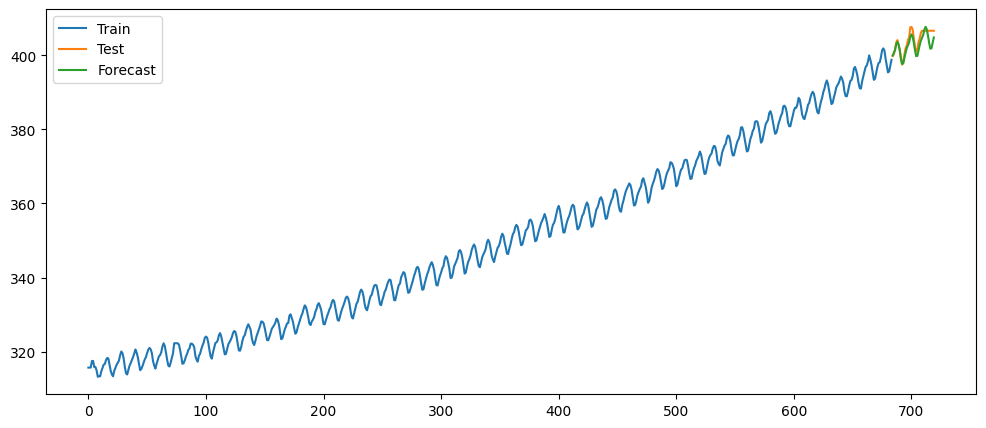

In [105]:
forecast = results.forecast(steps=len(test))

plt.figure(figsize=(12,5))
plt.plot(train.index, train['co2'], label='Train')
plt.plot(test.index, test['co2'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test['co2'], forecast)
rmse = np.sqrt(mean_squared_error(test['co2'], forecast))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 1.3897785577558623
RMSE: 1.8253385726778903


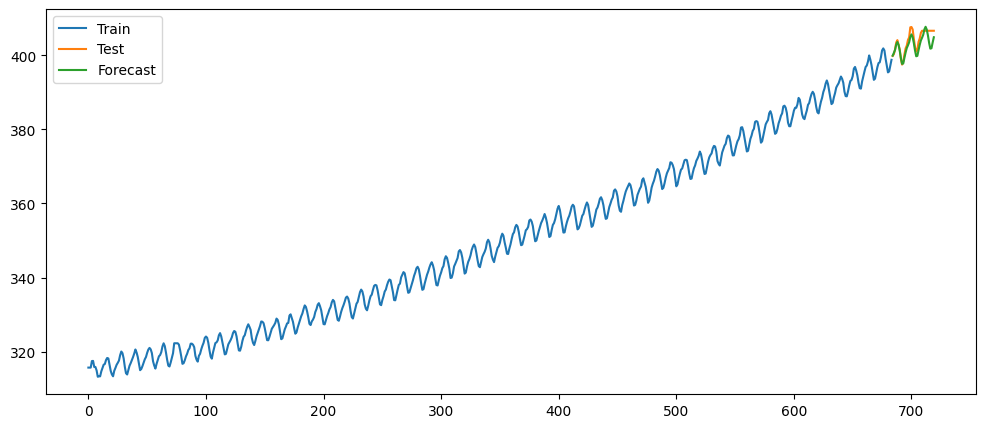

In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_es = ExponentialSmoothing(train['co2'],
                                trend='add',
                                seasonal='add',
                                seasonal_periods=12)

results_es = model_es.fit()
forecast_es = results_es.forecast(len(test))

plt.figure(figsize=(12,5))
plt.plot(train.index, train['co2'], label='Train')
plt.plot(test.index, test['co2'], label='Test')
plt.plot(test.index, forecast_es, label='Forecast')
plt.legend()
plt.show()

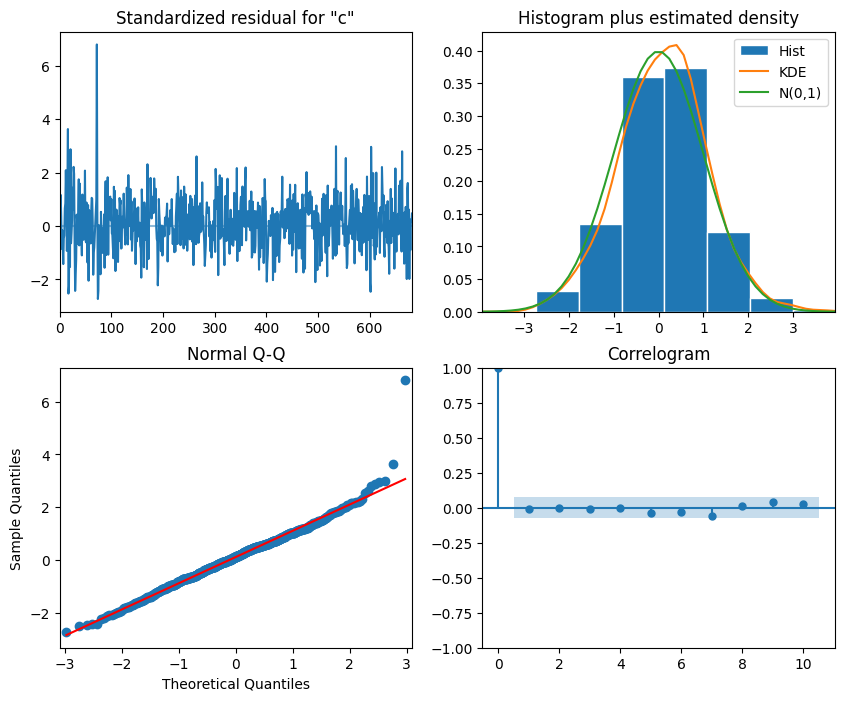

In [108]:
results.plot_diagnostics(figsize=(10,8))
plt.show()
